# Exercise 4

This week we will practice how to conduct data classification and aggregation using geopandas. Last week in exercise 3 we analyzed buffer zones around shopping centers. This week we will take into account travel distances using data from the [Helsinki Region Travel Time Matrix](https://blogs.helsinki.fi/accessibility/helsinki-region-travel-time-matrix/).


## Problem 1: Join accessibility datasets into a grid and visualize the data on a map (10 points)


![P1 example result](img/traveltimes_example.png)

*Desired output from problem 1: Travel times by public transport (PT) and car to Itis and Myyrmanni*

**Data:**

The [data/](data/) directory in this repository contains all the required input data for this exercise:
 
- Travel time data: `travel_times_to_[XXXXXXX]_[NAME-OF-THE-CENTER].txt` (Travel times and distances in the Helsinki Region to different shopping centers  as text files)
- Reference grid: `MetropAccess_YKR_grid_EurefFIN.shp`. 

Column `from_id` in the travel time data sets corresponds to the `YKR_ID` column in the grid shapefile.
     
**Steps:**

In problem 1 we will focus on travel times to **Itis** and **Myyrmanni**. Our goal is to visualize travel times by public transport and car to both shopping centers. Before plotting the maps we need to classify the data. Your task is to **first develop the processing steps using Itis as input**, and then repeat the steps for Myyrmanni.

- Read the Polygon grid `MetropAccess_YKR_grid_EurefFIN.shp` into a GeoDataFrame called `grid` using geopandas:

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify as mpc
import os
import pandas

In [2]:
def read_shp(path):
    assert os.path.isfile(path), 'Input must be a valid filepath'
    return gpd.read_file(path)

def read_csv(path, sep):
    assert os.path.isfile(path), 'Input must be a valid filepath'
    return pandas.read_csv(path, sep=sep)

In [3]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
grid = read_shp('data/MetropAccess_YKR_grid_EurefFIN.shp')
grid.head()

,x,y,YKR_ID,geometry
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6..."
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6..."
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6..."
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6..."
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6..."


In [4]:
# NON-EDITABLE TEST CELL
# Check the data
print("\nYKR GRID: {len(grid)} rows")


YKR GRID: {len(grid)} rows


- Read the travel time data file for Itis using Pandas into a variable called `data`. Separator is `";"` in the input file.
- Select only following columns from the file:
    
   - `pt_r_t`
   - `car_r_t`
   - `from_id`
   - `to_id`

In [5]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data = read_csv('data/TravelTimes_to_5944003_Itis.txt', ';')[['pt_r_t', 'car_r_t', 'from_id', 'to_id']]
data.head()

,pt_r_t,car_r_t,from_id,to_id
0,132,50,5785640,5944003
1,135,51,5785641,5944003
2,137,58,5785642,5944003
3,141,57,5785643,5944003
4,125,50,5787544,5944003


In [6]:
# NON-EDITABLE TEST CELL
# Check the data
print(f"\nITIS: {len(data)} rows")


ITIS: 13231 rows


- join attributes from `data` to `grid` using the [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) function: 
  - **`YKR_ID`** -column in `grid` corresponds to the **`from_id`** column in `data`
  - store the join output into a variable called `data_geo` 

In [7]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
data_geo = grid.merge(data, how='left', left_on='YKR_ID', right_on='from_id')
data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",132,50,5785640,5944003
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",135,51,5785641,5944003
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",137,58,5785642,5944003
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",141,57,5785643,5944003
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",125,50,5787544,5944003


In [8]:
# NON-EDITABLE TEST CELL
#Check data type
assert type(data_geo) == gpd.geodataframe.GeoDataFrame, "Output should be a geodataframe."

In [9]:
# NON-EDITABLE TEST CELL
# Check that the merged output have (at least) the necessary columns
required_columns = ['YKR_ID', 'pt_r_t', 'car_r_t', 'geometry']

assert all(x in data_geo.columns for x in required_columns), "Couldn't find all required columns."

- Remove all rows containing no-data values (`-1`) from `data_geo`. You can for example [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) the no-data values with numpy's `np.nan`, and then drop rows containing no-data values using the [DataFrame.dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) function.

In [10]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import numpy as np

data_geo = data_geo.replace(-1, np.nan)
data_geo = data_geo.dropna()

In [11]:
# NON-EDITABLE TEST CELL
# Check that -1 values are not present in the columns
assert -1 not in data_geo["pt_r_t"], "NoData values (-1) should be removed from the data!"


- Classify the travel times for both travel modes (public transport and private car) into five-minute intervals 
    - Create a `UserDefined` classifier using the [pysal/mapclassify](https://github.com/pysal/mapclassify#userdefined) library using these class breaks: `5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60`
    - Apply the classifier to `pt_r_t` and `car_r_t` columns and store the results to `pt_r_t_cl` and `car_r_t_cl` columns, respectively
    - Notice that these 12 class breaks will produce 13 classes (1 class break divides the data into two classes).

In [12]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
cal = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
classifier = mpc.UserDefined.make(bins=cal)
classifier

<function mapclassify.classifiers.MapClassifier.make.<locals>.classifier(data, cls_instance=None)>

In [13]:
data_geo['car_r_t_cl'] = data_geo[['car_r_t']].apply(classifier)
data_geo['pt_r_t_cl'] = data_geo[['pt_r_t']].apply(classifier)

In [14]:
data_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id,car_r_t_cl,pt_r_t_cl
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",132.0,50.0,5785640,5944003.0,9,12
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",135.0,51.0,5785641,5944003.0,10,12
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",137.0,58.0,5785642,5944003.0,11,12
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",141.0,57.0,5785643,5944003.0,11,12
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",125.0,50.0,5787544,5944003.0,9,12


In [15]:
# NON-EDITABLE TEST CELL
#Check the output
print("travel times by public transport:")
print(data_geo[['YKR_ID', 'pt_r_t', 'pt_r_t_cl']].head())

travel times by public transport:
    YKR_ID  pt_r_t  pt_r_t_cl
0  5785640   132.0         12
1  5785641   135.0         12
2  5785642   137.0         12
3  5785643   141.0         12
4  5787544   125.0         12


In [16]:
# NON-EDITABLE TEST CELL
#Check the output
print("Travel times by car:")
print(data_geo[['YKR_ID','car_r_t', 'car_r_t_cl']].head())

Travel times by car:
    YKR_ID  car_r_t  car_r_t_cl
0  5785640     50.0           9
1  5785641     51.0          10
2  5785642     58.0          11
3  5785643     57.0          11
4  5787544     50.0           9


**Plot the classified travel times to Itis**:

![itis_example.png](img/itis_example.png)

Create a 1x2 plot where the you plot travel times by public transport and travel times by car to Itis:
- Create subplots using matplotlib having 1 row and 2 columns (use parameters `nrows` & `ncols`), and the figure size should be 10 inches by 5 inches (use parameter `figsize`)
- Add titles for the subplots as seen in the example above
- Remove the empty whitespace around the plots using function `plt.tight_layout()`
- Save the figure into disk with filename `itis_accessibility.png`


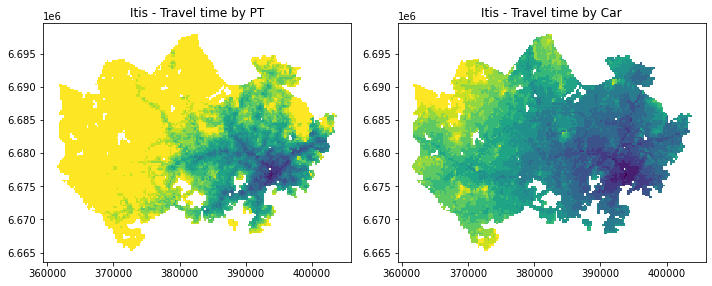

In [17]:
# Define output filename for the figure in here and use it when saving the file:
output_fig1 = "itis_accessibility.png"
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
data_geo.plot(ax=ax, column='pt_r_t_cl')
ax.set_title('Itis - Travel time by PT')
data_geo.plot(ax=ax1, column='car_r_t_cl')
ax1.set_title('Itis - Travel time by Car')
plt.tight_layout()
plt.savefig(output_fig1)
plt.show()
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE

In [18]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig1), "figure does not exists!"

**Repeat the steps for Myyrmanni:**

![myyrmanni example figure](img/myyrmanni_example.png)

Next, your task is to repeat all the same steps for **Myyrmanni** (`data/TravelTimes_to_5902043_Myyrmanni.txt`):

    # Read text file using pandas into a variable called data
    # Select columns 'pt_r_t', 'car_r_t', 'from_id', 'to_id'
    # Make table join between grid and travel time data. Store output in a variable called data_geo
    # Remove no data values
    # Classify the values in columns 'pt_r_t', 'car_r_t' into new columns 'pt_r_t_cl', 'car_r_t_cl'
    # Plot travel times by public transport and travel times by car.
    # Save output image to file (myyrmanni_accessibility.png)

*Hint: You can copy paste the code from your earlier solutions in here, just change the input file path.*


In [19]:
def select_columns(data, *columns):
    """select specific columns from data and return them"""
    return data[[*columns]]

def merge_data(left_data, right_data, how, left_on='YKR_ID', right_on='from_id', *args):
    """Do a merge on data with columns that match in some way"""
    return left_data.merge(right_data, how=how, left_on=left_on, right_on=right_on, *args)

def drop_na(data):
    """Drop NaN values from all rows in the data"""
    naless_data = data.replace(-1, np.nan)
    return naless_data.dropna()

def user_defined_classify(data, bins, *columns):
    classifier = mpc.UserDefined.make(bins=bins)
    class_columns = [f"{column}_cl" for column in columns]
    for new_column, column in zip(class_columns, columns):
        data[new_column] = data[[column]].apply(classifier)

In [20]:
mya_data = read_csv('data/TravelTimes_to_5902043_Myyrmanni.txt', ';')
mya_data.head()

,from_id,to_id,walk_t,walk_d,car_r_t,car_r_d,car_m_t,car_m_d,pt_r_t,pt_r_tt,pt_r_d,pt_m_t,pt_m_tt,pt_m_d
0,5785640,5902043,295,20668,39,22321,35,22321,90,121,21119,98,129,21119
1,5785641,5902043,258,18052,39,22532,35,22532,93,115,21325,101,127,21325
2,5785642,5902043,259,18131,47,22216,42,20440,95,115,21443,103,128,21443
3,5785643,5902043,263,18424,51,24773,46,22996,99,126,21736,107,132,21736
4,5787544,5902043,288,20179,38,21895,34,21895,83,103,20630,91,108,20630


In [21]:
mya_data = select_columns(mya_data, 'pt_r_t', 'car_r_t', 'from_id', 'to_id')
mya_data.head()

,pt_r_t,car_r_t,from_id,to_id
0,90,39,5785640,5902043
1,93,39,5785641,5902043
2,95,47,5785642,5902043
3,99,51,5785643,5902043
4,83,38,5787544,5902043


In [22]:
mya_geo = merge_data(grid, mya_data, how='left')
mya_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",90,39,5785640,5902043
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",93,39,5785641,5902043
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",95,47,5785642,5902043
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",99,51,5785643,5902043
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",83,38,5787544,5902043


In [23]:
mya_geo = drop_na(mya_geo)
print(len(mya_geo))

13020


In [24]:
user_defined_classify(mya_geo, cal, 'pt_r_t', 'car_r_t')
mya_geo.head()

,x,y,YKR_ID,geometry,pt_r_t,car_r_t,from_id,to_id,pt_r_t_cl,car_r_t_cl
0,381875.0,6697880.0,5785640,"POLYGON ((382000.000 6697750.000, 381750.000 6...",90.0,39.0,5785640,5902043.0,12,7
1,382125.0,6697880.0,5785641,"POLYGON ((382250.000 6697750.000, 382000.000 6...",93.0,39.0,5785641,5902043.0,12,7
2,382375.0,6697880.0,5785642,"POLYGON ((382500.000 6697750.000, 382250.000 6...",95.0,47.0,5785642,5902043.0,12,9
3,382625.0,6697880.0,5785643,"POLYGON ((382750.000 6697750.000, 382500.000 6...",99.0,51.0,5785643,5902043.0,12,10
4,381125.0,6697630.0,5787544,"POLYGON ((381250.000 6697500.000, 381000.000 6...",83.0,38.0,5787544,5902043.0,12,7


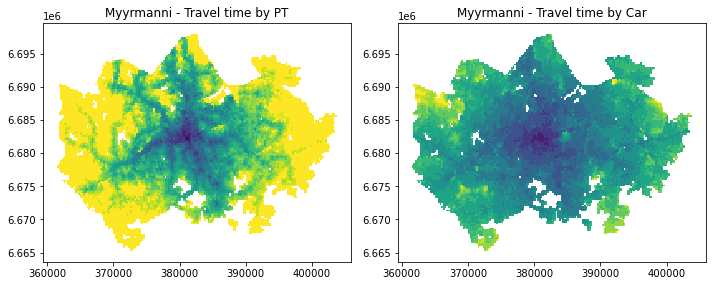

In [25]:
# Define output filename for the figure in here and use it when saving the file:

output_fig2 = "Myyrmanni_accessibility.png"
fig, (ax, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
mya_geo.plot(ax=ax, column='pt_r_t_cl')
ax.set_title('Myyrmanni - Travel time by PT')
mya_geo.plot(ax=ax1, column='car_r_t_cl')
ax1.set_title('Myyrmanni - Travel time by Car')
plt.tight_layout()
plt.savefig(output_fig2)
plt.show()
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE

In [27]:
# NON-EDITABLE TEST CELL
# Check that output figure file exists
import os
assert os.path.isfile(output_fig2), "figure does not exists!"


**Optional:  4-panel figure**

As an optional task, plot travel times to Itis and Myyrmanni all in one 4-panel figure (see example at the top of this page)!

Hints:
- create a for-loop where you repeat all the steps for Itis and Myyrmanni (you can iterate over a list of input filepaths)
- Before the for-loop, create a figure with 4 subplots (2 rows and 2 columns) and use figsize=(10,10)
- Inside the for-loop, plot each map into one of the subplots. 
- save the figure as `shopping_center_accessibility.png` 

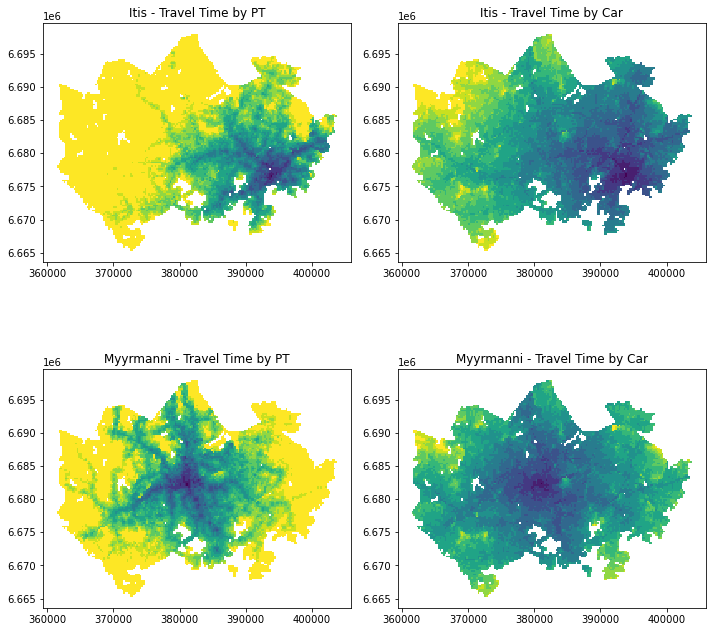

In [41]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# data_geo(2 plots) and mya_geo(2 plots)
# columns to plot 'pt_r_t_cl' and 'car_r_t_cl'
# row1 plot is 'Itis'
# row2 plot is 'Myyrmanni'
fig, (row1, row2) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for data, city, row in zip((data_geo, mya_geo), ('Itis', 'Myyrmanni'), (row1, row2)):
    for idx, colname, title in zip(range(2), ('pt_r_t_cl', 'car_r_t_cl'), ('Travel Time by PT', 'Travel Time by Car')):
        data.plot(ax=row[idx], column=colname)
        row[idx].set_title(f"{city} - {title}")

plt.tight_layout()
plt.savefig('shopping_center_accessibility.png')
plt.show()

**Finally**, check that you have provided adequate comments in your code.

**Reflections:** (Only for enrolled students)
- If you want to ask feedback on spesific parts of your code, please leave your comment in here: 

YOUR ANSWER HERE

### Done!


**Remember to commit the output figures** to your exercise repository! (One for Itis and one for Myyrmanni, or optionally a combined 4-panel figure for both shopping centers and both travel modes).

That's it! Once you have plotted the data and saved the output you are ready to continue with Problem 2.